# Artificial Neural Network

## Import Modules and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("C:/Users/sanja/Downloads/abalone.csv")
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
df.Column1.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
d = {'M':1, 'F':2, 'I':3}
df.Column1 = df.Column1.map(d)
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<AxesSubplot:>

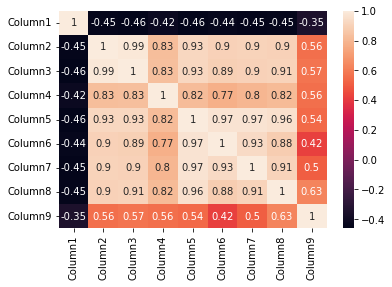

In [ ]:
sns.heatmap(df.corr(), annot=True)

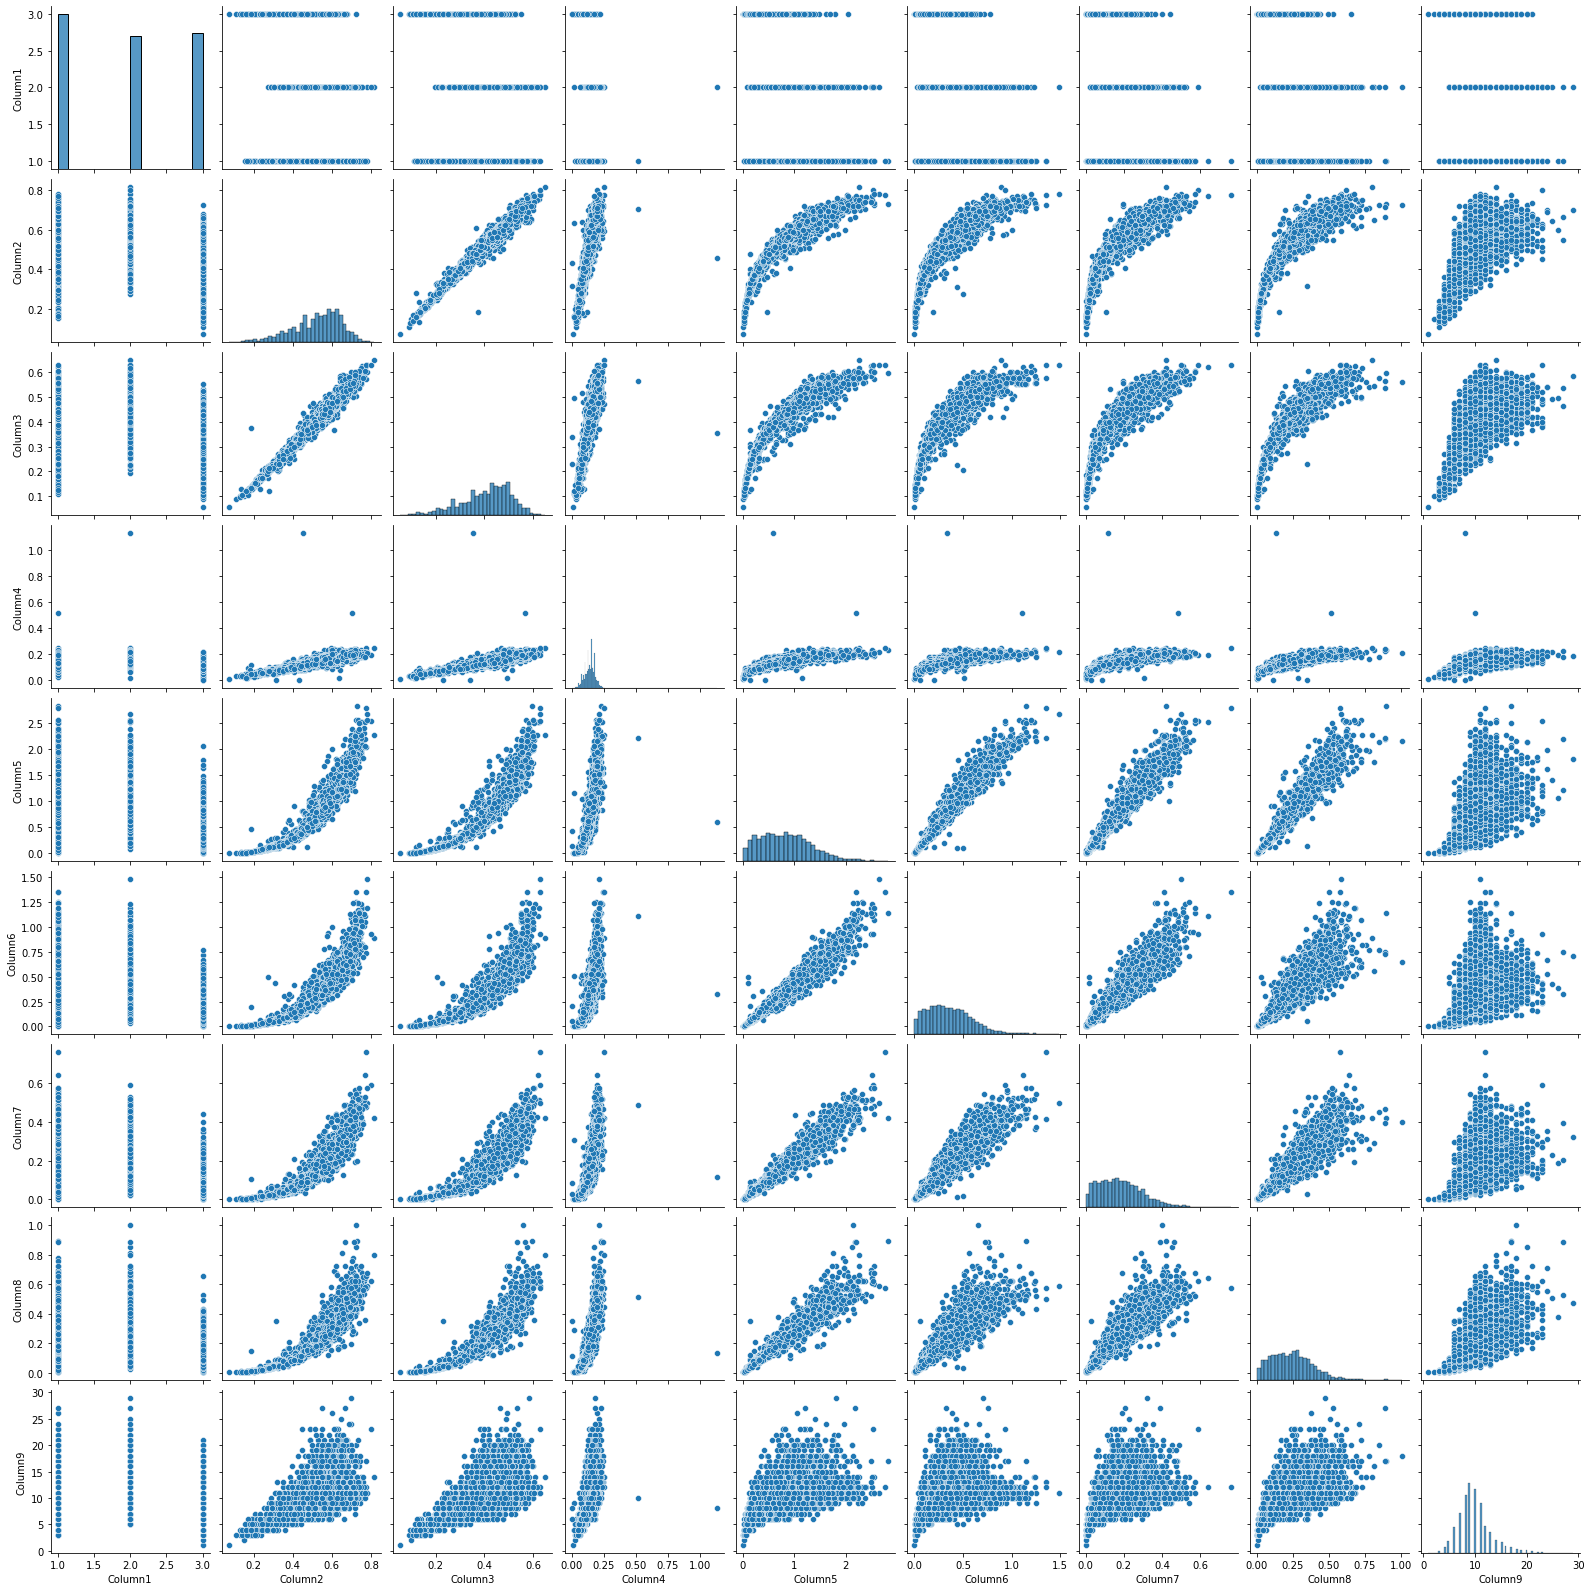

In [ ]:
sns.pairplot(df)

# Splitting the Feature and Target

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
x, y

(      Column2  Column3  Column4  Column5  Column6  Column7  Column8  Column9
 0       0.455    0.365    0.095   0.5140   0.2245   0.1010   0.1500       15
 1       0.350    0.265    0.090   0.2255   0.0995   0.0485   0.0700        7
 2       0.530    0.420    0.135   0.6770   0.2565   0.1415   0.2100        9
 3       0.440    0.365    0.125   0.5160   0.2155   0.1140   0.1550       10
 4       0.330    0.255    0.080   0.2050   0.0895   0.0395   0.0550        7
 ...       ...      ...      ...      ...      ...      ...      ...      ...
 4172    0.565    0.450    0.165   0.8870   0.3700   0.2390   0.2490       11
 4173    0.590    0.440    0.135   0.9660   0.4390   0.2145   0.2605       10
 4174    0.600    0.475    0.205   1.1760   0.5255   0.2875   0.3080        9
 4175    0.625    0.485    0.150   1.0945   0.5310   0.2610   0.2960       10
 4176    0.710    0.555    0.195   1.9485   0.9455   0.3765   0.4950       12
 
 [4177 rows x 8 columns],
 0       1
 1       1
 2       2
 3 

## Splitting the Feature and Target into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
xtrain, xtest, ytrain, ytest

(      Column2  Column3  Column4  Column5  Column6  Column7  Column8  Column9
 3962    0.720    0.575    0.195   2.1505   1.0745   0.3820   0.5850       10
 2417    0.310    0.235    0.060   0.1200   0.0415   0.0330   0.0400       11
 1692    0.625    0.485    0.175   1.3620   0.6765   0.2615   0.3705       10
 3235    0.665    0.535    0.155   1.3830   0.5960   0.2565   0.4850       14
 971     0.515    0.390    0.155   0.7125   0.3695   0.1370   0.1550        7
 ...       ...      ...      ...      ...      ...      ...      ...      ...
 4015    0.635    0.480    0.145   1.1810   0.6650   0.2290   0.2250       10
 3232    0.485    0.410    0.150   0.6960   0.2405   0.1625   0.2650       13
 2001    0.360    0.270    0.085   0.2185   0.1065   0.0380   0.0620        6
 1428    0.815    0.650    0.250   2.2550   0.8905   0.4200   0.7975       14
 1233    0.370    0.280    0.085   0.2170   0.1095   0.0350   0.0620        6
 
 [3341 rows x 8 columns],
       Column2  Column3  Column4  Co

## Fitting into the Model

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [ ]:
ann.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

## Predict the test result and validate the score

In [ ]:
ypred = ann.predict(xtest)
ypred

array([1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3,
       3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3,
       1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.46      0.76      0.57       307
           2       0.75      0.01      0.02       241
           3       0.67      0.77      0.72       288

    accuracy                           0.55       836
   macro avg       0.63      0.51      0.44       836
weighted avg       0.62      0.55      0.47       836



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(ytest, ypred), confusion_matrix(ytest, ypred)

(0.5466507177033493,
 array([[232,   1,  74],
        [203,   3,  35],
        [ 66,   0, 222]], dtype=int64))

## Fitting into the Model

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(10, 10, 10), alpha=0.001, max_iter=1000)

In [ ]:
ann.fit(xtrain, ytrain)
ann.score(xtest, ytest)

0.5574162679425837

## Predict the test result and validate the score

In [ ]:
ypred=ann.predict(xtest)

In [ ]:
print(classification_report(ypred, ytest))
accuracy_score(ypred, ytest), confusion_matrix(ypred, ytest)

              precision    recall  f1-score   support

           1       0.71      0.50      0.58       467
           2       0.15      0.48      0.23        75
           3       0.77      0.68      0.72       294

    accuracy                           0.56       836
   macro avg       0.54      0.55      0.51       836
weighted avg       0.68      0.56      0.60       836



(0.5610047846889952,
 array([[232, 175,  60],
        [ 38,  36,   1],
        [ 59,  34, 201]], dtype=int64))

# ANN Using Tensorflow Keras

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras import datasets, layers, models

## Creating the Model

In [ ]:
ann = models.Sequential([
    layers.Dense(units=6, activation='relu', input_dim = 8),
    layers.Dense(30, activation='relu'),
    layers.Dense(10, activation = 'relu'),
    layers.Dense(1, activation='sigmoid')
])
ann

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(xtrain, ytrain)

105/105 [==============================] - 1s 2ms/step - loss: -0.4304 - accuracy: 0.3556


## Predict the test result and validate the score

In [ ]:
ypred = ann.predict(xtest)
ypred = ypred > 0.5


27/27 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.39354066985645936